In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import display
from comparers import ModelComparer, plot_decision_boundary
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix, get_complexity,\
                 group_metrics
from surrogate_tree import train_surrogate_tree, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_rules_of_tree_for_class,\
                 tree_to_constraint_matrix, extract_rules, print_rules,\
                 get_pruned_trees, eval_trees

In [2]:
with open('data/task.pickle', 'rb') as f:
    clf_a, clf_b, X, y, feature_names, feature_precisions = pickle.load(f)

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

# Explanations

In [5]:
%%time
trees = []
full_tree = train_surrogate_tree(X, mclass_diff)
trees = get_pruned_trees(full_tree, X, mclass_diff)
tree_it = iter(trees)
len(trees)

CPU times: user 42.6 ms, sys: 4.59 ms, total: 47.2 ms
Wall time: 65.3 ms


23

In [6]:
trees[-1].get_depth()

8

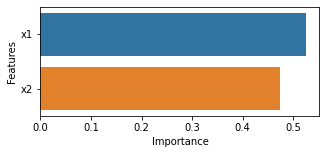

In [7]:
feature_importances, feature_order = get_feature_importances(trees[-1])
plot_feature_importances(feature_names, feature_importances, feature_order)

## 2 Leafs

In [8]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.09767705069039706, 1, 2)

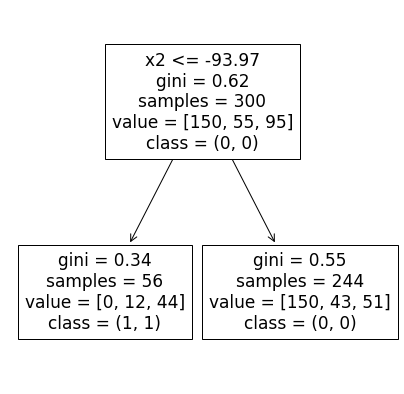

In [9]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [10]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 3 Leafs

In [11]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.08525998905309248, 2, 3)

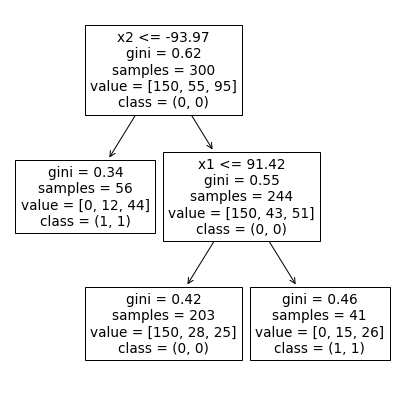

In [12]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [13]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 4 Leafs

In [14]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.07820698762107348, 3, 4)

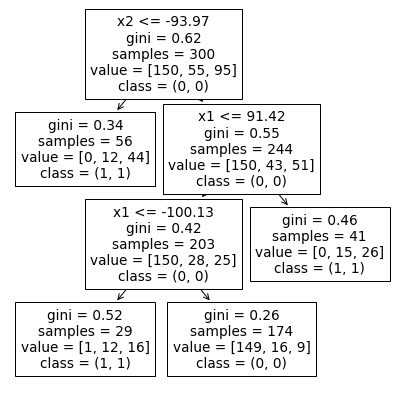

In [15]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [16]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 5 Leafs

In [17]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.032489594273933185, 4, 5)

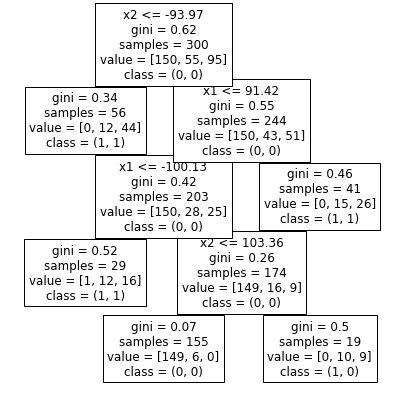

In [18]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [19]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -100.1 < x1 <= 91.4 and x2 > 103.4 => (1, 0) [0, 10, 9]


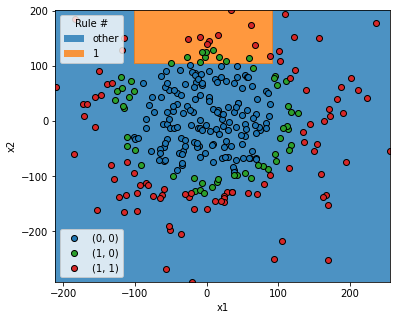

In [20]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 6 Leafs

In [21]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.02932471264367816, 4, 6)

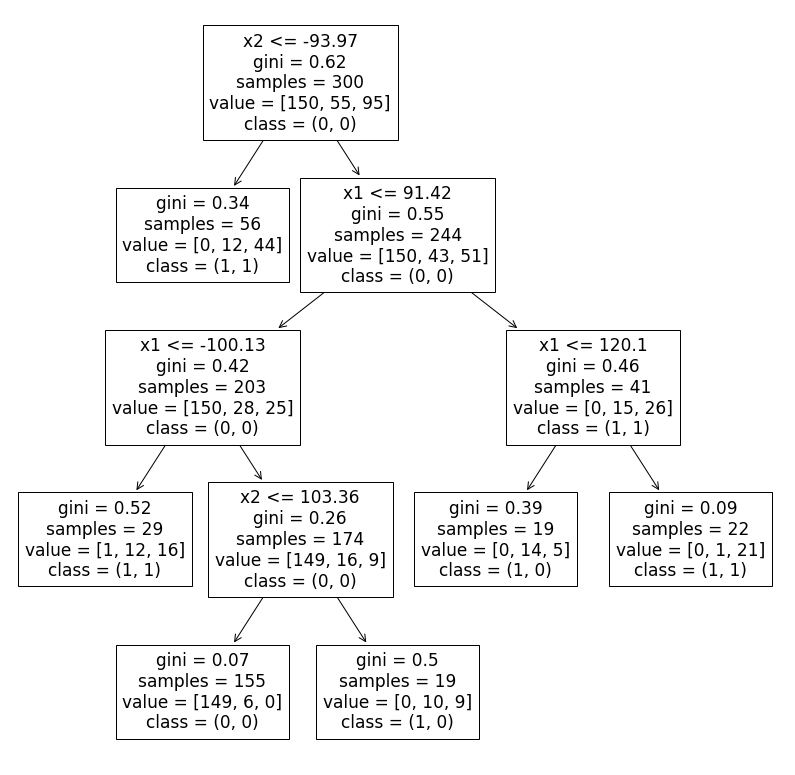

In [22]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [23]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
2. -100.1 < x1 <= 91.4 and x2 > 103.4 => (1, 0) [0, 10, 9]


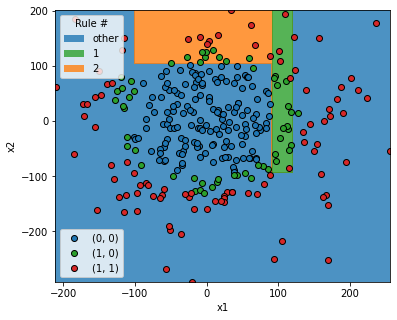

In [24]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 7 Leafs

In [25]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.025518341307814992, 4, 7)

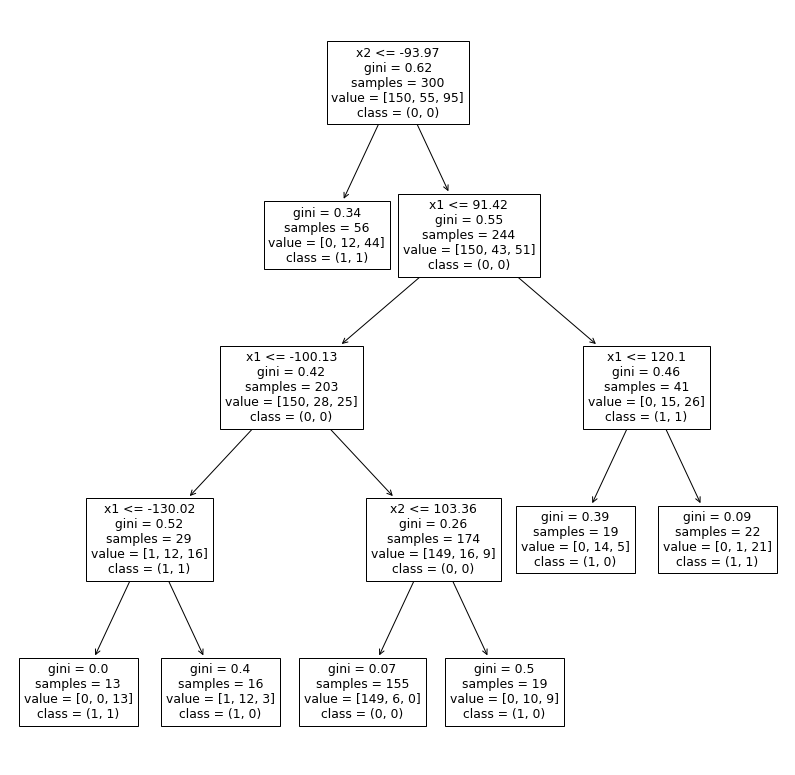

In [26]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [27]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
2. -100.1 < x1 <= 91.4 and x2 > 103.4 => (1, 0) [0, 10, 9]
3. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]


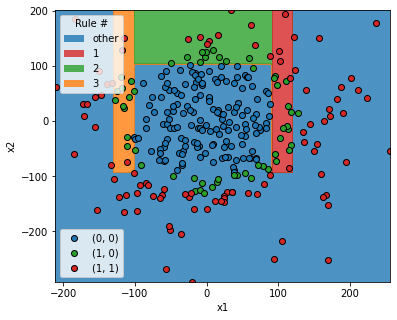

In [28]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 8 Leafs

In [29]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.02337566137566139, 5, 8)

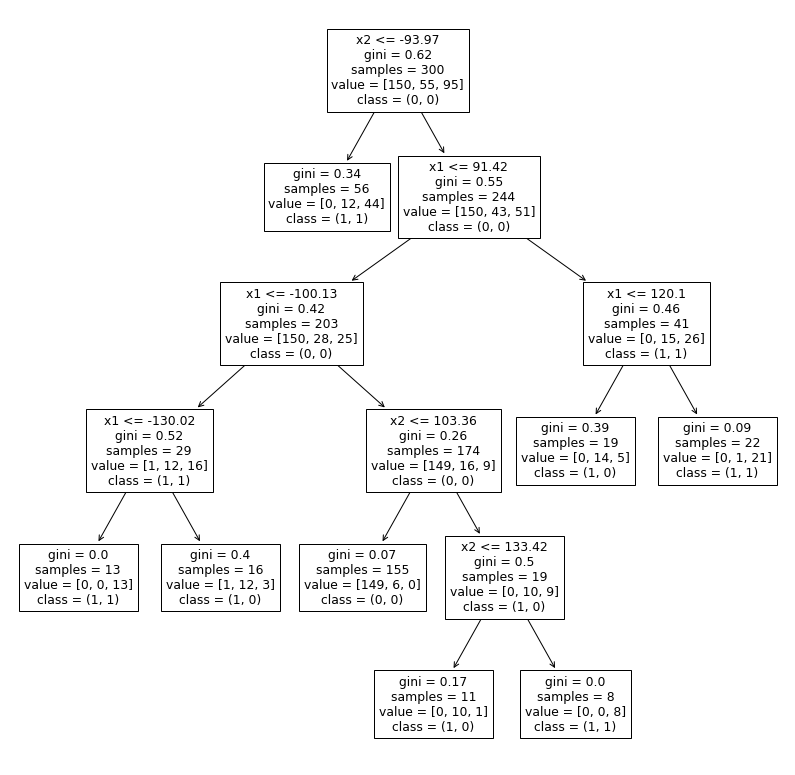

In [30]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [31]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
2. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
3. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]


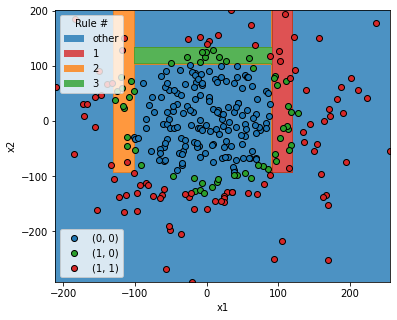

In [32]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 9 Leafs

In [33]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.017285714285714283, 5, 9)

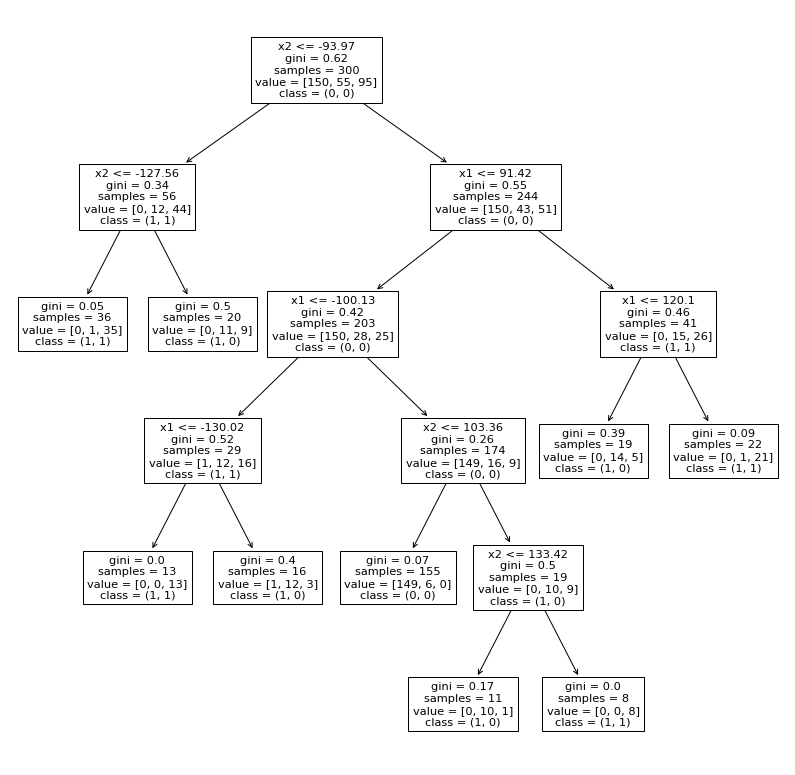

In [34]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [35]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 9]
2. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
3. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
4. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]


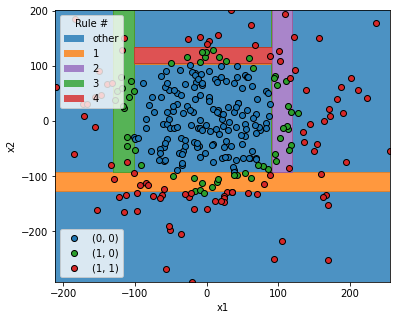

In [36]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 10 Leafs

In [37]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.01571428571428572, 5, 10)

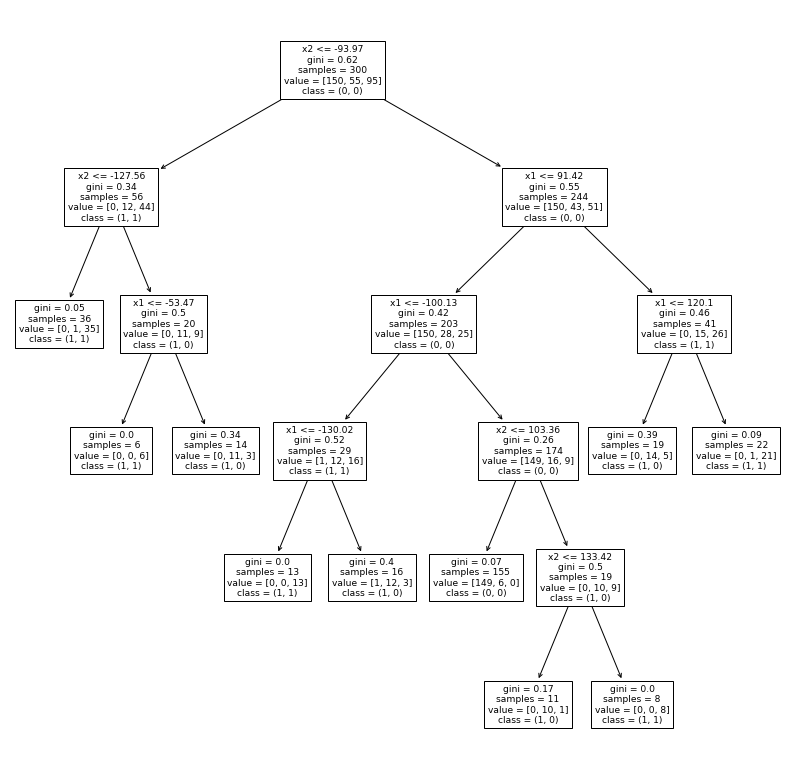

In [38]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [39]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
2. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
3. x1 > -53.5 and -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 3]
4. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]


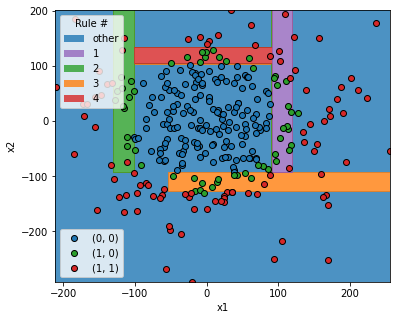

In [40]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 11 Leafs

In [41]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.01516425658138669, 5, 11)

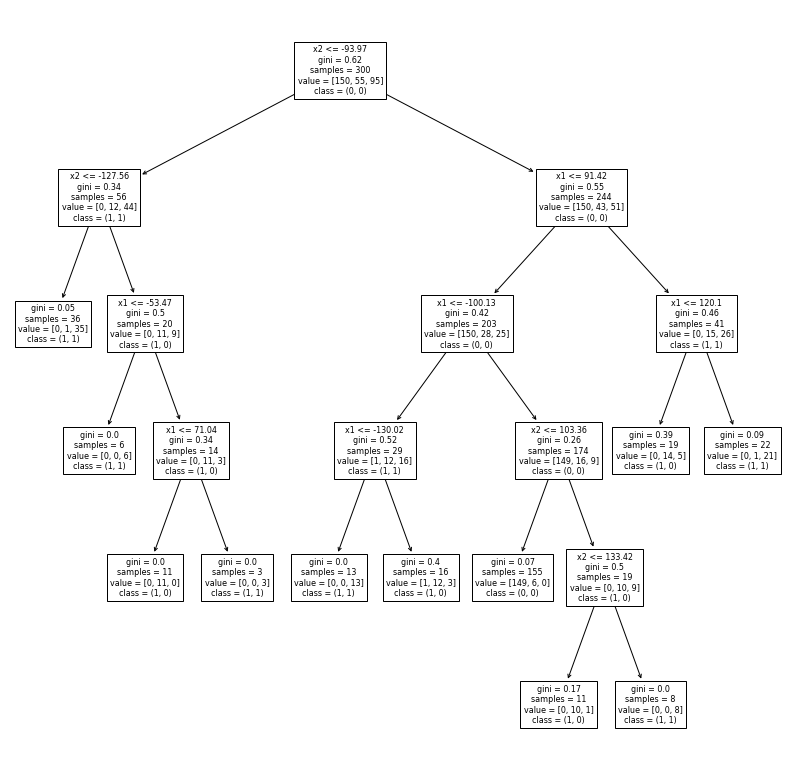

In [42]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [43]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
2. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
3. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]
4. -53.5 < x1 <= 71.0 and -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 0]


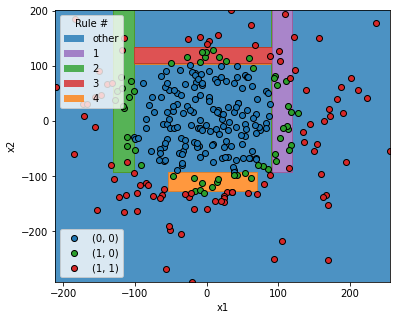

In [44]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 12 Leafs

In [45]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.013037593984962402, 5, 12)

In [46]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and x2 > -94.0 => (1, 0) [0, 14, 5]
2. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
3. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]
4. -53.5 < x1 <= 71.0 and -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 0]


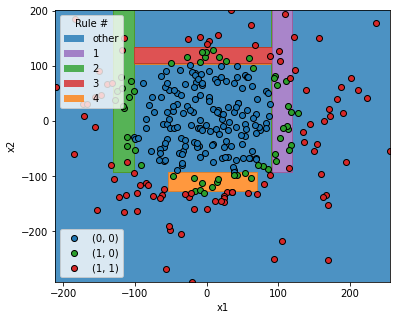

In [47]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 13 Leafs

In [48]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.01111111111111111, 5, 13)

In [49]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
2. 91.4 < x1 <= 120.1 and -94.0 < x2 <= 78.1 => (1, 0) [0, 13, 1]
3. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]
4. -53.5 < x1 <= 71.0 and -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 0]


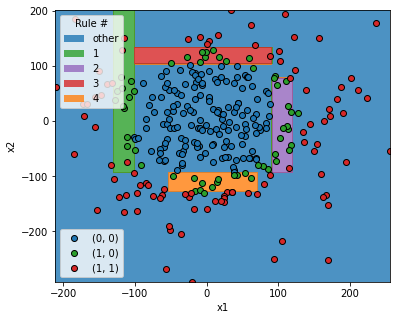

In [50]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 14 Leafs

In [51]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0093452380952381, 6, 14)

In [52]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -130.0 < x1 <= -100.1 and x2 > -94.0 => (1, 0) [1, 12, 3]
2. 91.4 < x1 <= 120.1 and -94.0 < x2 <= 78.1 => (1, 0) [0, 13, 1]
3. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]
4. -53.5 < x1 <= 71.0 and -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 0]
5. 45.9 < x1 <= 91.4 and -94.0 < x2 <= -77.3 => (1, 0) [0, 4, 0]


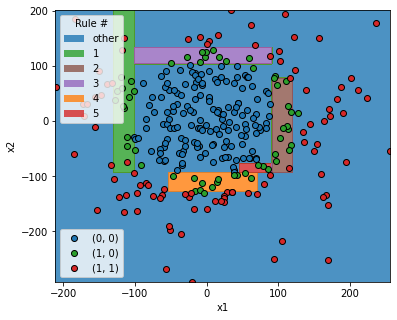

In [53]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)

## 15 Leafs

In [54]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.006190476190476192, 6, 15)

In [55]:
constraints, rules, class_occurences, labels, node_ids, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.4 < x1 <= 120.1 and -94.0 < x2 <= 78.1 => (1, 0) [0, 13, 1]
2. -130.0 < x1 <= -100.1 and -94.0 < x2 <= 104.0 => (1, 0) [1, 12, 1]
3. -100.1 < x1 <= 91.4 and 103.4 < x2 <= 133.4 => (1, 0) [0, 10, 1]
4. -53.5 < x1 <= 71.0 and -127.6 < x2 <= -94.0 => (1, 0) [0, 11, 0]
5. 45.9 < x1 <= 91.4 and -94.0 < x2 <= -77.3 => (1, 0) [0, 4, 0]


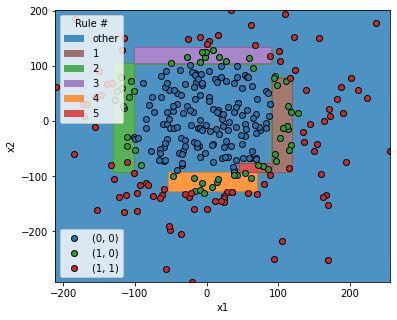

In [56]:
plot_rules_of_tree_for_class(tree, comparer.class_names[tree.classes_], ['(1, 0)'], X, mclass_diff, comparer.class_names, feature_names, rule_order)
plt.savefig('figures/gaussian-baseline-final.pdf', bbox_inches='tight')

In [57]:
def get_predicted_rules(indices=None):
    indices = np.where(np.in1d(mclass_diff, comparer.difference_classes))[0] if indices is None else indices
    pred_node_ids = tree.apply(X[indices])
    node_id_to_rule_no = lambda node_id: np.where(node_ids == node_id)[0][0] + 1 if node_id in node_ids else None
    pred_rule_nos = [node_id_to_rule_no(pred_node_id) for pred_node_id in pred_node_ids]
    return pd.Series(pred_rule_nos, index=indices)

In [58]:
pred_rules = get_predicted_rules()
pred_rules.index[pd.isna(pred_rules)]

Int64Index([124, 155, 169, 203, 221], dtype='int64')

# Evaluation

In [76]:
with open('data/test.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [77]:
metrics = eval_trees(trees, feature_names, comparer.class_names, X_test=X_test, y_test=y_test)
metrics

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Precision,Recall,F1 Score,Support,Label,Leafs,Alpha,Rules,Constraints
"(0, 0)",0.533416,0.987535,0.692681,4332.0,"(0, 0)",2,0.097677,1,1
"(1, 1)",0.793939,0.389784,0.522867,4033.0,"(1, 1)",2,0.097677,1,1
"(0, 0)",0.635607,0.969991,0.767980,4332.0,"(0, 0)",3,0.085260,1,2
"(1, 1)",0.752729,0.632532,0.687416,4033.0,"(1, 1)",3,0.085260,2,3
"(0, 0)",0.777673,0.955217,0.857350,4332.0,"(0, 0)",4,0.078207,1,3
...,...,...,...,...,...,...,...,...,...
"(1, 0)",0.742206,0.757187,0.749622,1635.0,"(1, 0)",26,0.003077,10,38
"(1, 1)",0.960977,0.946442,0.953654,4033.0,"(1, 1)",26,0.003077,13,38
"(0, 0)",0.942453,0.952678,0.947538,4332.0,"(0, 0)",28,0.000000,4,16
"(1, 0)",0.745300,0.751682,0.748477,1635.0,"(1, 0)",28,0.000000,11,42


In [78]:
grouped_metrics, constraints = group_metrics(metrics, by='Alpha')

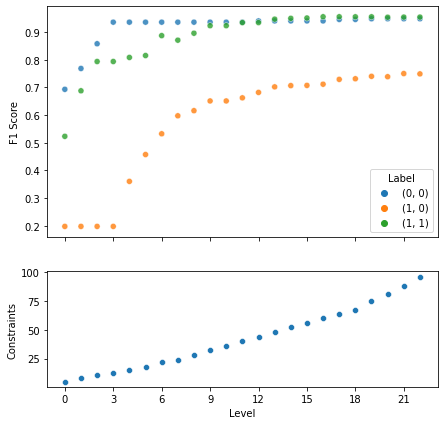

In [62]:
fig, axs = plt.subplots(nrows=2, figsize=(7, 7), sharex='all', gridspec_kw={'height_ratios': [2,1]})
sns.scatterplot(data=grouped_metrics, x='Level', y='F1 Score', hue='Label', alpha=0.8, ax=axs[0])
sns.scatterplot(data=constraints, ax=axs[1])
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

In [63]:
with open('data/fidelity-baseline.pickle', 'wb') as f:
    pickle.dump((grouped_metrics, constraints), f)

In [64]:
grouped_metrics

Label  Precision    Recall  F1 Score  Support  Leafs     Alpha  \
Level                                                                      
0     0  (0, 0)   0.533416  0.987535  0.692681   4332.0    2.0  0.097677   
      1  (1, 0)   0.294189  0.148624  0.197481   1635.0    5.0  0.032490   
      2  (1, 1)   0.793939  0.389784  0.522867   4033.0    2.0  0.097677   
1     0  (0, 0)   0.635607  0.969991  0.767980   4332.0    3.0  0.085260   
      1  (1, 0)   0.294189  0.148624  0.197481   1635.0    5.0  0.032490   
...         ...        ...       ...       ...      ...    ...       ...   
21    1  (1, 0)   0.742206  0.757187  0.749622   1635.0   26.0  0.003077   
      2  (1, 1)   0.960977  0.946442  0.953654   4033.0   26.0  0.003077   
22    0  (0, 0)   0.942453  0.952678  0.947538   4332.0   28.0  0.000000   
      1  (1, 0)   0.745300  0.751682  0.748477   1635.0   28.0  0.000000   
      2  (1, 1)   0.960977  0.946442  0.953654   4033.0   28.0  0.000000   

         Rules  Constraints  
Level                        
0     0    1.0          1.0  
      1    1.0          3.0  
      2    1.0          1.0  
1     0    1.0          2.0  
      1    1.0          3.0  
...        ...          ...  
21    1   10.0         38.0  
      2   13.0         38.0  
22    0    4.0         16.0  
      1   11.0         42.0  
      2   13.0         38.0  

[69 rows x 9 columns]

In [65]:
grouped_metrics.loc[13, :]

,Label,Precision,Recall,F1 Score,Support,Leafs,Alpha,Rules,Constraints
0,"(0, 0)",0.929152,0.950600,0.939754,4332.0,15.0,0.00619,2.0,8.0
1,"(1, 0)",0.720361,0.683792,0.701600,1635.0,15.0,0.00619,5.0,20.0
2,"(1, 1)",0.948207,0.944210,0.946204,4033.0,15.0,0.00619,8.0,20.0


In [66]:
constraints

Level
0      5.0
1      8.0
2     11.0
3     12.0
4     15.0
5     18.0
6     22.0
7     24.0
8     28.0
9     32.0
10    36.0
11    40.0
12    44.0
13    48.0
14    52.0
15    56.0
16    60.0
17    64.0
18    67.0
19    75.0
20    81.0
21    88.0
22    96.0
Name: Constraints, dtype: float64

In [79]:
constraints[constraints <= 20]

Level
0     5.0
1     8.0
2    11.0
3    12.0
4    15.0
5    18.0
Name: Constraints, dtype: float64

In [81]:
grouped_metrics.loc[5, :]

,Label,Precision,Recall,F1 Score,Support,Leafs,Alpha,Rules,Constraints
0,"(0, 0)",0.918354,0.952909,0.935312,4332.0,7.0,0.025518,1.0,4.0
1,"(1, 0)",0.432787,0.484404,0.457143,1635.0,7.0,0.025518,3.0,9.0
2,"(1, 1)",0.854422,0.778577,0.814738,4033.0,7.0,0.025518,3.0,5.0


# Additional Material

In [67]:
tree = next(iter(filter(lambda tree: tree.get_n_leaves() == 15, trees)))

In [72]:
constraints, rules, class_occurences, labels, rule_order = extract_rules(tree, feature_names, comparer.difference_classes, precisions=feature_precisions, latex=True)
for label, rule in zip(labels, rules):
    print(f'\item if ${rule}$, then ${comparer.class_names[label]}$')

\item if $91.4 < \mathit{x_1} \leq 120.1 \land -94.0 < \mathit{x_2} \leq 78.1$, then $(1, 0)$
\item if $-130.0 < \mathit{x_1} \leq -100.1 \land -94.0 < \mathit{x_2} \leq 104.0$, then $(1, 0)$
\item if $-100.1 < \mathit{x_1} \leq 91.4 \land 103.4 < \mathit{x_2} \leq 133.4$, then $(1, 0)$
\item if $-53.5 < \mathit{x_1} \leq 71.0 \land -127.6 < \mathit{x_2} \leq -94.0$, then $(1, 0)$
\item if $45.9 < \mathit{x_1} \leq 91.4 \land -94.0 < \mathit{x_2} \leq -77.3$, then $(1, 0)$


In [73]:
import seaborn as sns

<AxesSubplot:xlabel='x1', ylabel='x2'>

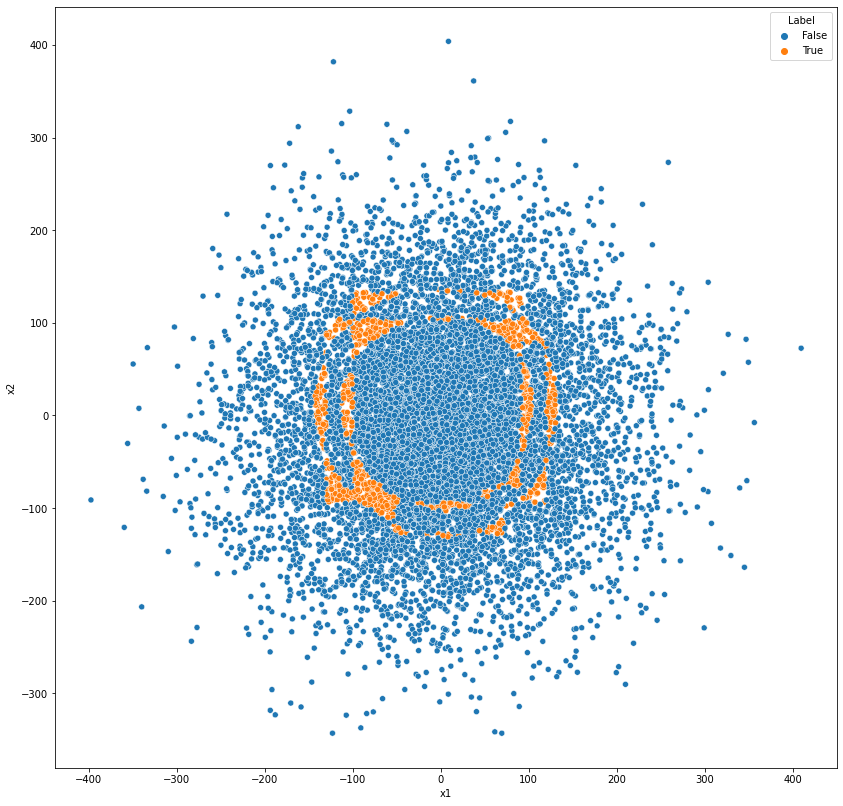

In [74]:
df = pd.DataFrame(X_test, columns=feature_names)
df['Label'] = tree.predict(X_test) != y_test
fig, ax = plt.subplots(figsize=(14, 14))
sns.scatterplot(data=df, x='x1', y='x2', hue='Label', ax=ax)